In [43]:
import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
import numpy as np
import matplotlib.pylab as plt


#little k's shouldn't impact eq
#what if little k's were 10, what changes
#look at literature for measured k values
#incorporate any info
#binding rate estrogen vs tamoxifen
#which parameters (little k) binding estrogen

#how does system turn back on after tamoxifen taken out
#assuming constant inhibitor, pulse tamoxifen, shows how frequently to give tamoxifen

#Start I at 0, then E: at time > 10: I = 10-100nm

#make these 3 kl's equal kl2=kl3=kl4 
#and different from kl7-9 to see diff tamoxifen binding vs estradiol binding, not going to change equilibrium

r = te.loada('''
R1: ER + ER -> ER2 ; k1*((ER^2) - (K1*ER2))

R2: ER2 + H -> ER2H ; k2*((ER2*H) - (K2*ER2H))    #make these 3 kl's equal kl2=kl3=kl4 
R3: ER2H + H -> ER2H2 ; k3*((ER2H*H) - (K3*ER2H2)) #and different from kl7-9 to see diff tamoxifen binding vs estradiol binding, not going to change equilibrium
R4: ER + H -> ERH ; k4*((ER*H) - (K4*ERH))

R5: ERH + ER -> ER2H ; k5*((ER*ERH) - ((K1*K2*ER2H)/K4))
R6: ERH + ERH -> ER2H2 ; k6*((ERH^2) - ((K1*K2*K3*ER2H2)/K4^2))

R7: ER2 + I -> ER2I ; k7*((ER2*I) - (K7*ER2I))
R8: ER2I + I -> ER2I2 ; k8*((ER2I*I) - (K8*ER2I2))
R9: ER + I -> ERI ; k9*((ER*I) - (K9*ERI))
R10: ERI + ER -> ER2I ; k10*((ER*ERI)- ((K1*K7*ER2I)/K9))
R11: ERI + ERI -> ER2I2 ; k11*((ERI^2)- ((K1*K7*K8*ER2I2)/K9^2))

R12: ERH + ERI -> ER2HI ; k12*((ERI*ERH) - ((K1*K7*K13*ER2HI)/(K4*K9)))
R13: ER2I + H -> ER2HI ; k13*((ER2I * H) - (K13*ER2HI))
R14: ER2H + I -> ER2HI ; k14*((ER2H*I) - ((K7*K13*ER2HI)/K2))
R15: ER2 + D -> ER2D; k15*((ER2*D) - (K16*ER2D))

R16: ER2H + D -> ER2HD ; k16*((ER2H*D) - (K16*ER2HD))
R17: ER2H2 + D -> ER2H2D ; k17*((ER2H2*D) - (K17*ER2H2D))

R18: ER2I + D -> ER2ID ; k18*((ER2*D) - (K18*ER2ID))
R19: ER2I2 + D -> ER2I2D ; k19*((ER2I2*D) - (K19*ER2I2D))
R20: ER2HI + D -> ER2HID ; k20*((ER2HI*D) - (K20*ER2HID))

#tamoxifen metabolites bind to ER


#mRNA synthesis and degredation
R21: -> r ; (ksrb*ER2D) + (ksrH*(ER2HD+ER2H2D)) + (ksrI*(ER2ID+ER2I2D)) + (ksrHI*ER2HID)
R22: r -> ; kdr*r

#protein synthesis and degredation
R23: -> p ; ksp*r
R24: p -> ; kdp*p

#tamoxifen clearance
R25: I -> ; 0.33*I

#only these 4 are mass conserved
#don't run steady state values
#these are conserved moieties
H=0.5
ER=300
I=100.0
D=1.0

ER2=0
ERH=0; ER2H=0; ER2H2=0
ERI=0; ER2I=0; ER2I2=0
ER2HI=0
ER2D=0; ER2HD=0; ER2H2D=0
ER2ID=0; ER2I2D=0; ER2HID=0

r=0
p=0

#dissociation constants
K1=25
K2=0.2
K3=0.1
K4=0.25
K5=20
K6=8
K7=10
K8=150
K9=30
K10=8.3
K11=41.5
K12=26.67
K13=0.8
K14=40
K15=8
K16=2.4
K17=1.2
K18=50
K19=87
K20=10 #can use 10-20

#in future: set to a and vary a
k1 = 1.0 ; k2 = 1.0; 
k3 = 1.0; k4= 1.0; k5 =1.0; k6 = 1.0; k7 =1.0; 
k8 = 1.0; k9 = 1.0; k10 = 1.0;
k11 = 1.0; k12 = 1.0; k13 = 1.0;
k14 = 1.0; k15 = 1.0; k16 = 1.0; k17 = 1.0; k18 = 1.0; k19 = 1.0; k20 = 1.0;

#rate constants, kinetic model of transcription
ksrH=0.195
ksrI=0.02
ksrHI=0.05
ksrb=0.001
kdr=0.0025
ksp=0.001
kdp=2*10^-5
''')


In [11]:
import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
import numpy as np
import matplotlib.pylab as plt

# Reversible Model 

rr = te.loada('''
R1: ER + ER -> ER2 ; k1*((ER^2) - (K1*ER2))
R1R: ER2 -> ER + ER; k1r*((K1*ER2) - (ER^2)) 

R2: ER2 + H -> ER2H ; k2*((ER2*H) - (K2*ER2H))
R2R: ER2H -> ER2 + H; k2r*((K2*ER2H) - (ER2*H))

R3: ER2H + H -> ER2H2 ; k3*((ER2H*H) - (K3*ER2H2)) 
R3R: ER2H2 -> ER2H + H; k3r*((K3*ER2H2) -(ER2H*H))

R4: ER + H -> ERH ; k4*((ER*H) - (K4*ERH))
R4R: ERH -> ER + H; k4r*((K4*ERH) - (ER*H))

R5: ERH + ER -> ER2H ; k5*((ER*ERH) - ((K1*K2*ER2H)/K4))
R5R: ER2H -> ERH + ER; k5r*(((K1*K2*ER2H)/K4) - (ER*ERH))

R6: ERH + ERH -> ER2H2 ; k6*((ERH^2) - ((K1*K2*K3*ER2H2)/K4^2))
R6R: ER2H2 -> ERH + ERH; k6r*(((K1*K2*K3*ER2H2)/K4^2) - (ERH^2))

R7: ER2 + I -> ER2I ; k7*((ER2*I) - (K7*ER2I))
R7R: ER2I -> ER2 + H; k7r*((K7*ER2I) - (ER2*I))

R8: ER2I + I -> ER2I2 ; k8*((ER2I*I) - (K8*ER2I2))
R8R: ER2I2 -> ER2I + I; k8r*((K8*ER2I2) - (ER2I*I))

R9: ER + I -> ERI ; k9*((ER*I) - (K9*ERI))
R9R: ERI -> ER + I; k9r*((K9*ERI)-(ER*I))

R10: ERI + ER -> ER2I ; k10*((ER*ERI)- ((K1*K7*ER2I)/K9))
R10R: ER2I -> ERI + ER; k10r*(((K1*K7*ER2I)/K9) - (ER*ERI))

R11: ERI + ERI -> ER2I2 ; k11*((ERI^2)- ((K1*K7*K8*ER2I2)/K9^2))
R11R: ER2I2 -> ERI + ERI; k11r*(((K1*K7*K8*ER2I2)/K9^2) - (ERI^2))

R12: ERH + ERI -> ER2HI ; k12*((ERI*ERH) - ((K1*K7*K13*ER2HI)/(K4*K9)))
R12R: ER2HI -> ERH + ERI ; k12r*(((K1*K7*K13*ER2HI)/(K4*K9)) - (ERI*ERH))

R13: ER2I + H -> ER2HI ; k13*((ER2I * H) - (K13*ER2HI))
R13R: ER2HI -> ER2I + H ; k13r*((K13*ER2HI) - (ER2I * H))

R14: ER2H + I -> ER2HI ; k14*((ER2H*I) - ((K7*K13*ER2HI)/K2))
R14R: ER2HI -> ER2H + I ; k14r*(((K7*K13*ER2HI)/K2) - (ER2H*I))

R15: ER2 + D -> ER2D; k15*((ER2*D) - (K16*ER2D))
R15R: ER2D -> ER2 + D; k15r*((K16*ER2D) - (ER2*D))

R16: ER2H + D -> ER2HD ; k16*((ER2H*D) - (K16*ER2HD))
R16R: ER2HD -> ER2H + D; k16r*((K16*ER2HD) - (ER2H*D))

R17: ER2H2 + D -> ER2H2D ; k17*((ER2H2*D) - (K17*ER2H2D))
R17R: ER2H2D -> ER2H2 + D; k17r*((K17*ER2H2D) - (ER2H2*D))

R18: ER2I + D -> ER2ID ; k18*((ER2*D) - (K18*ER2ID))
R18R: ER2ID -> ER2I + D; k18r*((K18*ER2ID) - (ER2*D))

R19: ER2I2 + D -> ER2I2D ; k19*((ER2I2*D) - (K19*ER2I2D))
R19R: ER2I2D -> ER2I2 + D; k19r*((K19*ER2I2D) - (ER2I2*D))


R20: ER2HI + D -> ER2HID ; k20*((ER2HI*D) - (K20*ER2HID))
R20R: ER2HID -> ER2HI + D; k20r*((K20*ER2HID) - (ER2HI*D))

#mRNA synthesis and degredation
R21: -> r ; (ksrb*ER2D) + (ksrH*(ER2HD+ER2H2D)) + (ksrI*(ER2ID+ER2I2D)) + (ksrHI*ER2HID)
R22: r -> ; kdr*r

#protein synthesis and degredation
R23: -> p ; ksp*r
R24: p -> ; kdp*p

#only these 4 are mass conserved
#don't run steady state values
#these are conserved moieties
H=1.0
ER=1.0
I=1.0
D=2.0

ER2=0
ERH=0; ER2H=0; ER2H2=0
ERI=0; ER2I=0; ER2I2=0
ER2HI=0
ER2D=0; ER2HD=0; ER2H2D=0
ER2ID=0; ER2I2D=0; ER2HID=0

r=0
p=0

#dissociation constants
K1=25
K2=0.2
K3=0.1
K4=0.25
K5=20
K6=8
K7=10
K8=150
K9=30
K10=8.3
K11=41.5
K12=26.67
K13=0.8
K14=40
K15=8
K16=2.4
K17=1.2
K18=50
K19=87
K20=10 #can use 10-20

#in future: set to a and vary a
k1 = 1.0 ; k2 = 1.0; 
k3 = 1.0; k4= 1.0; k5 =1.0; k6 = 1.0; k7 =1.0; 
k8 = 1.0; k9 = 1.0; k10 = 1.0;
k11 = 1.0; k12 = 1.0; k13 = 1.0;
k14 = 1.0; k15 = 1.0; k16 = 1.0; k17 = 1.0; k18 = 1.0; k19 = 1.0; k20 = 1.0;

x = 0.5
k1r = k1 * x; k2r = k2*x; k3r=k3*x; k4r=k4*x; k5r=k5*x
k6r=k6*x; k7r=k7*x; k8r=k8*x; k9r=k9*x; k10r=k10*x; k11r=k11*x
k12r=k12*x; k13r=k13*x; k14r=k14*x; k15r=k15*x; k16r=k16*x
k17r=k17*x; k18r=k18*x; k19r=k19*x; k20r=k20*x

#rate constants, kinetic model of transcription
ksrH=0.195
ksrI=0.02
ksrHI=0.05
ksrb=0.001
kdr=0.0025
ksp=0.001
kdp=2*10^-5
''')


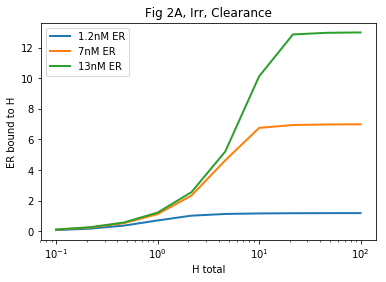

In [45]:
#figure 2(A)
#total hormone vs. total ER bound to hormone

logscale = np.logspace(-1.0,2.0,num=10,endpoint=True,base=10.0)

result = np.empty(shape=(0,2))
for S in logscale:
    r.resetAll()
    r.H=S
    r.ER=1.2
    r.I=0
    m = r.simulate(0,20,300,['ER2H','ER2H2','ERH','ER2HI','ER2HD','ER2H2D','ER2HID'])
    ER_b1 = (2*m[299,0]) + (2*m[299,1]) + m[299,2] + (2*m[299,3]) + (2*m[299,4]) + (2*m[299,5]) + (2*m[299,6])
    result = np.vstack([result,[S,ER_b1]])

sevennM = np.empty(shape=(0,1))
for S in logscale:
    r.resetAll()
    r.H=S
    r.ER= 7.0
    r.I=0
    m= r.simulate(0,20,300,['ER2H','ER2H2','ERH','ER2HI','ER2HD','ER2H2D','ER2HID'])
    ER_b2 = (2*m[299,0]) + (2*m[299,1]) + m[39,2] + (2*m[299,3]) + (2*m[299,4]) + (2*m[299,5]) + (2*m[299,6])
    sevennM = np.vstack([sevennM,ER_b2])

thirteennM = np.empty(shape=(0,1))
for S in logscale:
    r.resetAll()
    r.H=S
    r.ER= 13.0
    r.I=0
    m=r.simulate(0,20,300,['ER2H','ER2H2','ERH','ER2HI','ER2HD','ER2H2D','ER2HID'])
    ER_b3 = (2*m[299,0]) + (2*m[299,1]) + m[299,2] + (2*m[299,3]) + (2*m[299,4]) + (2*m[299,5]) + (2*m[299,6])
    thirteennM = np.vstack([thirteennM,ER_b3])
    
result = np.hstack([result,sevennM])
result = np.hstack([result,thirteennM])

te.plotArray(result, loc='upper left', xscale='log', title='Fig 2A, Irr, Clearance', xlabel='H total', ylabel='ER bound to H',labels=['1.2nM ER','7nM ER','13nM ER'])




[[1.00000000e-02 9.96675007e-01]
 [3.59381366e-02 9.69879603e-01]
 [1.29154967e-01 9.62815108e-01]
 [4.64158883e-01 9.61790168e-01]
 [1.66810054e+00 9.61330362e-01]
 [5.99484250e+00 9.12557632e-01]
 [2.15443469e+01 3.22119414e-01]
 [7.74263683e+01 9.02474644e-02]
 [2.78255940e+02 2.51448692e-02]
 [1.00000000e+03 6.99909291e-03]]


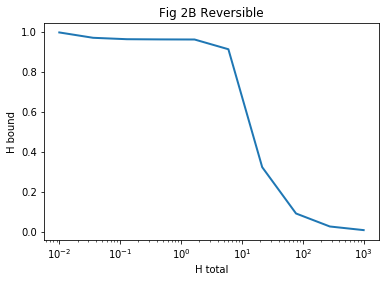

In [20]:
#figure 2(B)
#total hormone vs. hormone bound

logscale = np.logspace(-2.0,3.0,num=10,endpoint=True,base=10.0)

result = np.empty(shape=(0,2))
for S in logscale:
    rr.resetAll()
    rr.H=S #total H
    rr.ER=7.0
    rr.I=0.5
    m = rr.simulate(0,20,300,['H'])
    H_free = (S - m[299,0])/S
    result = np.vstack([result,[S,H_free]])

print(result)
te.plotArray(result, loc='upper left', xscale='log', title='Fig 2B Reversible', xlabel='H total', ylabel='H bound')
    


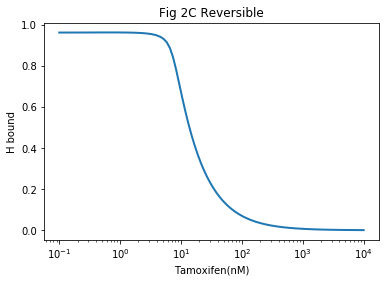

In [47]:
#figure 2(C)
#total tamoxifen vs. hormone bound

logscale = np.logspace(-1.0,4.0,num=100,endpoint=True,base=10.0)

result = np.empty(shape=(0,2))
for S in logscale:
    r.resetAll()
    r.I=S 
    r.ER=7
    r.H=S
    m = r.simulate(0,20,300,['H'])
    H_bound = (S - m[299,0])/S
    result = np.vstack([result,[S,H_bound]])

te.plotArray(result, loc='upper left', xscale='log', title='Fig 2C Reversible', xlabel='Tamoxifen(nM)', ylabel='H bound')


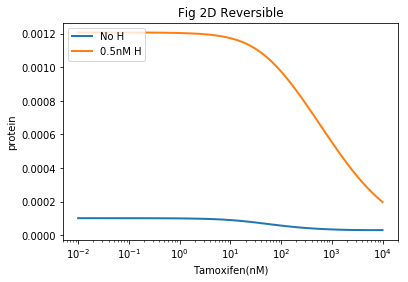

In [49]:
#figure 2D
#tamoxifen vs protein (0 H), tamoxifen vs protein (0.5nM H)

logscale = np.logspace(-2.0,4.0,num=100,endpoint=True,base=10.0)

result = np.empty(shape=(0,3))
for S in logscale:
    r.resetAll()
    r.I=S
    r.ER=7
    r.H=0
    m = r.simulate(0,20,300,['p'])
    protein1 = m[299,0]
    r.resetAll()
    r.I=S
    r.ER=7
    r.H=0.5
    n = r.simulate(0,20,300,['p'])
    protein2 = n[299,0]
    result = np.vstack([result,[S,protein1,protein2]])


te.plotArray(result, loc='upper left', xscale='log', title='Fig 2D Reversible', xlabel='Tamoxifen(nM)', ylabel='protein',labels=['No H','0.5nM H'])


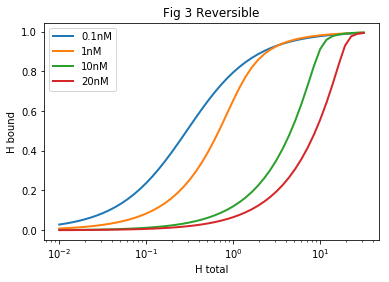

In [25]:
#figure 3
#total hormone vs fraction of receptor binding sites occupied by hormone

logscale = np.logspace(-2.0,1.5,num=50,endpoint=True,base=10.0)

result = np.empty(shape=(0,5))
for S in logscale:
    rr.resetAll()
    rr.I=0 
    rr.ER=0.1
    rr.H=S
    m = rr.simulate(0,20,300,['ER2H','ER2H2','ERH','ER2HI','ER2HD','ER2H2D','ER2HID'])
    a = ((2*m[299,0]) + (2*m[299,1]) + m[299,2] + (2*m[299,3]) + (2*m[299,4]) + (2*m[299,5]) + (2*m[299,6]))/0.1

    rr.resetAll()
    rr.I=0 
    rr.ER=1.0
    rr.H=S
    m = rr.simulate(0,20,300,['ER2H','ER2H2','ERH','ER2HI','ER2HD','ER2H2D','ER2HID'])
    b = ((2*m[299,0]) + (2*m[299,1]) + m[299,2] + (2*m[299,3]) + (2*m[299,4]) + (2*m[299,5]) + (2*m[299,6]))/1.0
    
    rr.resetAll()
    rr.I=0 
    rr.ER=10
    rr.H=S
    m = rr.simulate(0,20,300,['ER2H','ER2H2','ERH','ER2HI','ER2HD','ER2H2D','ER2HID'])
    c = ((2*m[299,0]) + (2*m[299,1]) + m[299,2] + (2*m[299,3]) + (2*m[299,4]) + (2*m[299,5]) + (2*m[299,6]))/10.0
    
    rr.resetAll()
    rr.I=0 
    rr.ER=20
    rr.H=S
    m = rr.simulate(0,20,300,['ER2H','ER2H2','ERH','ER2HI','ER2HD','ER2H2D','ER2HID'])
    d = ((2*m[299,0]) + (2*m[299,1]) + m[299,2] + (2*m[299,3]) + (2*m[299,4]) + (2*m[299,5]) + (2*m[299,6]))/20.0
    
    result = np.vstack([result,[S,a,b,c,d]])



te.plotArray(result, loc='upper left', xscale='log', title='Fig 3 Reversible', xlabel='H total', ylabel='H bound',labels=['0.1nM','1nM','10nM','20nM'])


In [56]:
# added clearance of Tamoxifen
# added effects of 4-OH, considered only the combination where 2 4-OH bound or 4-OH/hormone (no combinations with Tamox)
# assumed they had the same ability to activate transcription as tamoxifen
# irreversible model

import tellurium as te; te.setDefaultPlottingEngine('matplotlib')
import numpy as np
import matplotlib.pylab as plt


j = te.loada('''
R1: ER + ER -> ER2 ; k1*((ER^2) - (K1*ER2))

R2: ER2 + H -> ER2H ; k2*((ER2*H) - (K2*ER2H))    #make these 3 kl's equal kl2=kl3=kl4 
R3: ER2H + H -> ER2H2 ; k3*((ER2H*H) - (K3*ER2H2)) #and different from kl7-9 to see diff tamoxifen binding vs estradiol binding, not going to change equilibrium
R4: ER + H -> ERH ; k4*((ER*H) - (K4*ERH))

R5: ERH + ER -> ER2H ; k5*((ER*ERH) - ((K1*K2*ER2H)/K4))
R6: ERH + ERH -> ER2H2 ; k6*((ERH^2) - ((K1*K2*K3*ER2H2)/K4^2))

R7: ER2 + I -> ER2I ; k7*((ER2*I) - (K7*ER2I))
R8: ER2I + I -> ER2I2 ; k8*((ER2I*I) - (K8*ER2I2))
R9: ER + I -> ERI ; k9*((ER*I) - (K9*ERI))
R10: ERI + ER -> ER2I ; k10*((ER*ERI)- ((K1*K7*ER2I)/K9))
R11: ERI + ERI -> ER2I2 ; k11*((ERI^2)- ((K1*K7*K8*ER2I2)/K9^2))

R12: ERH + ERI -> ER2HI ; k12*((ERI*ERH) - ((K1*K7*K13*ER2HI)/(K4*K9)))
R13: ER2I + H -> ER2HI ; k13*((ER2I * H) - (K13*ER2HI))
R14: ER2H + I -> ER2HI ; k14*((ER2H*I) - ((K7*K13*ER2HI)/K2))
R15: ER2 + D -> ER2D; k15*((ER2*D) - (K16*ER2D))

R16: ER2H + D -> ER2HD ; k16*((ER2H*D) - (K16*ER2HD))
R17: ER2H2 + D -> ER2H2D ; k17*((ER2H2*D) - (K17*ER2H2D))

R18: ER2I + D -> ER2ID ; k18*((ER2*D) - (K18*ER2ID))
R19: ER2I2 + D -> ER2I2D ; k19*((ER2I2*D) - (K19*ER2I2D))
R20: ER2HI + D -> ER2HID ; k20*((ER2HI*D) - (K20*ER2HID))

#tamoxifen metabolite 4-OH-tam
R7OH: ER2 + IOH -> ER2IOH ; k7*((ER2*IOH) - (50*K7*ER2IOH)) #added *50
R8OH: ER2IOH + IOH -> ER2IOH2 ; k8*((ER2IOH*IOH) - (K8*ER2IOH2)) 
R9OH: ER + IOH -> ERIOH ; k9*((ER*IOH) - (50*K9*ERIOH))  # added * 50
R10OH: ERIOH + ER -> ER2IOH ; k10*((ER*ERIOH)- ((K1*K7*ER2IOH)/K9))
R11OH: ERIOH + ERIOH -> ER2IOH2 ; k11*((ERIOH^2)- ((K1*K7*K8*ER2IOH2)/K9^2))

R12OH: ERH + ERIOH -> ER2HIOH ; k12*((ERIOH*ERH) - ((K1*K7*K13*ER2HIOH)/(K4*K9)))
R13OH: ER2IOH + H -> ER2HIOH ; k13*((ER2IOH * H) - (K13*ER2HIOH))
R14OH: ER2H + IOH -> ER2HIOH ; k14*((ER2H*IOH) - ((K7*K13*ER2HIOH)/K2))

R18OH: ER2IOH + D -> ER2IOHD ; k18*((ER2IOH*D) - (K18*ER2IOHD))
R19OH: ER2IOH2 + D -> ER2IOH2D ; k19*((ER2IOH2*D) - (K19*ER2IOH2D))
R20OH: ER2HIOH + D -> ER2HIOHD ; k20*((ER2HIOH*D) - (K20*ER2HIOHD))


#tamoxifen metabolite N-demethyl-tam
R7ID: ER2 + ID -> ER2ID ; k7*((ER2*ID) - (0.01*K7*ER2ID)) #added *0.01
R8ID: ER2ID + ID -> ER2ID2 ; k8*((ER2ID*ID) - (K8*ER2ID2)) 
R9ID: ER + ID -> ERID ; k9*((ER*ID) - (0.01*K9*ERID))  # added *0.01
R10ID: ERID + ER -> ER2ID ; k10*((ER*ERID)- ((K1*K7*ER2ID)/K9))
R11ID: ERID + ERID -> ER2ID2 ; k11*((ERID^2)- ((K1*K7*K8*ER2ID2)/K9^2))

R12ID: ERH + ERID -> ER2HID ; k12*((ERID*ERH) - ((K1*K7*K13*ER2HID)/(K4*K9)))
R13ID: ER2ID + H -> ER2HID ; k13*((ER2ID * H) - (K13*ER2HID))
R14ID: ER2H + ID -> ER2HID ; k14*((ER2H*ID) - ((K7*K13*ER2HID)/K2))

R18ID: ER2ID + D -> ER2IDD ; k18*((ER2ID*D) - (K18*ER2IDD))
R19ID: ER2ID2 + D -> ER2ID2D ; k19*((ER2ID2*D) - (K19*ER2ID2D))
R20ID: ER2HID + D -> ER2HIDD ; k20*((ER2HID*D) - (K20*ER2HIDD))

#mRNA synthesis and degredation
R21: -> r ; (ksrb*ER2D) + (ksrH*(ER2HD+ER2H2D)) + (ksrI*(ER2ID+ER2I2D+ER2IOH2D+ER2HIOHD+ER2IDD+ER2ID2D)) + (ksrHI*(ER2HID+ER2IOHD+ER2HIDD))
R22: r -> ; kdr*r

#protein synthesis and degredation 
R23: -> p ; ksp*r
R24: p -> ; kdp*p


#all inhibitor decay
R27: I -> ; I*1.0643*10^-5
R28: IOH -> ; I*1.3419*10^-5
R29: ID -> ; I*9.107*10^-6

H=0.5
ER=300
I=100
D=1.0
IOH=I*0.15
ID=I*1.5

ER2=0
ERH=0; ER2H=0; ER2H2=0
ERI=0; ER2I=0; ER2I2=0
ER2HI=0
ER2D=0; ER2HD=0; ER2H2D=0
ER2ID=0; ER2I2D=0; ER2HID=0


r=0
p=0


ER2IOH=0; ER2IOH2=0; ERIOH=0; ER2HIOH=0
ER2ID=0; ER2ID2=0; ERID=0; ER2HID=0

#dissociation constants
K1=25
K2=0.2
K3=0.1
K4=0.25
K5=20
K6=8
K7=10
K8=150
K9=30
K10=8.3
K11=41.5
K12=26.67
K13=0.8
K14=40
K15=8
K16=2.4
K17=1.2
K18=50
K19=87
K20=10 #can use 10-20

#in future: set to a and vary a
k1 = 1.0 ; k2 = 1.0; 
k3 = 1.0; k4= 1.0; k5 =1.0; k6 = 1.0; k7 =1.0; 
k8 = 1.0; k9 = 1.0; k10 = 1.0;
k11 = 1.0; k12 = 1.0; k13 = 1.0;
k14 = 1.0; k15 = 1.0; k16 = 1.0; k17 = 1.0; k18 = 1.0; k19 = 1.0; k20 = 1.0;

#rate constants, kinetic model of transcription
ksrH=0.195
ksrI=0.02
ksrHI=0.05
ksrb=0.001
kdr=0.0025
ksp=0.001
kdp=2*(10^-5)

''')



In [ ]:
factors = [10,20,30,40,100]
for i in factors:
    r.resetAll()
    r.x=i
    r.simulate(0,1000,1000,['Time','ER_bound_H','ER_bound_I','H','ER','p','r'])
    r.plot(title='Tamoxifen pulsed+ '+str(i), xlabel='Time(s)', ylabel='Concentration (nM)')

In [ ]:
# slider widget for nanohub
# model with metabolite extension
from ipywidgets.widgets import *
import tellurium as te

r = te.loada('''
R1: ER + ER -> ER2 ; k1*((ER^2) - (K1*ER2))

R2: ER2 + H -> ER2H ; k2*((ER2*H) - (K2*ER2H))    #make these 3 kl's equal kl2=kl3=kl4 
R3: ER2H + H -> ER2H2 ; k3*((ER2H*H) - (K3*ER2H2)) #and different from kl7-9 to see diff tamoxifen binding vs estradiol binding, not going to change equilibrium
R4: ER + H -> ERH ; k4*((ER*H) - (K4*ERH))

R5: ERH + ER -> ER2H ; k5*((ER*ERH) - ((K1*K2*ER2H)/K4))
R6: ERH + ERH -> ER2H2 ; k6*((ERH^2) - ((K1*K2*K3*ER2H2)/K4^2))

R7: ER2 + I -> ER2I ; k7*((ER2*I) - (K7*ER2I))
R8: ER2I + I -> ER2I2 ; k8*((ER2I*I) - (K8*ER2I2))
R9: ER + I -> ERI ; k9*((ER*I) - (K9*ERI))
R10: ERI + ER -> ER2I ; k10*((ER*ERI)- ((K1*K7*ER2I)/K9))
R11: ERI + ERI -> ER2I2 ; k11*((ERI^2)- ((K1*K7*K8*ER2I2)/K9^2))

R12: ERH + ERI -> ER2HI ; k12*((ERI*ERH) - ((K1*K7*K13*ER2HI)/(K4*K9)))
R13: ER2I + H -> ER2HI ; k13*((ER2I * H) - (K13*ER2HI))
R14: ER2H + I -> ER2HI ; k14*((ER2H*I) - ((K7*K13*ER2HI)/K2))
R15: ER2 + D -> ER2D; k15*((ER2*D) - (K16*ER2D))

R16: ER2H + D -> ER2HD ; k16*((ER2H*D) - (K16*ER2HD))
R17: ER2H2 + D -> ER2H2D ; k17*((ER2H2*D) - (K17*ER2H2D))

R18: ER2I + D -> ER2ID ; k18*((ER2*D) - (K18*ER2ID))
R19: ER2I2 + D -> ER2I2D ; k19*((ER2I2*D) - (K19*ER2I2D))
R20: ER2HI + D -> ER2HID ; k20*((ER2HI*D) - (K20*ER2HID))

#tamoxifen metabolite 4-OH-tam
R7OH: ER2 + IOH -> ER2IOH ; k7*((ER2*IOH) - (50*K7*ER2IOH)) #added *50
R8OH: ER2IOH + IOH -> ER2IOH2 ; k8*((ER2IOH*IOH) - (K8*ER2IOH2)) 
R9OH: ER + IOH -> ERIOH ; k9*((ER*IOH) - (50*K9*ERIOH))  # added * 50
R10OH: ERIOH + ER -> ER2IOH ; k10*((ER*ERIOH)- ((K1*K7*ER2IOH)/K9))
R11OH: ERIOH + ERIOH -> ER2IOH2 ; k11*((ERIOH^2)- ((K1*K7*K8*ER2IOH2)/K9^2))

R12OH: ERH + ERIOH -> ER2HIOH ; k12*((ERIOH*ERH) - ((K1*K7*K13*ER2HIOH)/(K4*K9)))
R13OH: ER2IOH + H -> ER2HIOH ; k13*((ER2IOH * H) - (K13*ER2HIOH))
R14OH: ER2H + IOH -> ER2HIOH ; k14*((ER2H*IOH) - ((K7*K13*ER2HIOH)/K2))

R18OH: ER2IOH + D -> ER2IOHD ; k18*((ER2IOH*D) - (K18*ER2IOHD))
R19OH: ER2IOH2 + D -> ER2IOH2D ; k19*((ER2IOH2*D) - (K19*ER2IOH2D))
R20OH: ER2HIOH + D -> ER2HIOHD ; k20*((ER2HIOH*D) - (K20*ER2HIOHD))


#tamoxifen metabolite N-demethyl-tam
R7ID: ER2 + ID -> ER2ID ; k7*((ER2*ID) - (0.01*K7*ER2ID)) #added *0.01
R8ID: ER2ID + ID -> ER2ID2 ; k8*((ER2ID*ID) - (K8*ER2ID2)) 
R9ID: ER + ID -> ERID ; k9*((ER*ID) - (0.01*K9*ERID))  # added *0.01
R10ID: ERID + ER -> ER2ID ; k10*((ER*ERID)- ((K1*K7*ER2ID)/K9))
R11ID: ERID + ERID -> ER2ID2 ; k11*((ERID^2)- ((K1*K7*K8*ER2ID2)/K9^2))

R12ID: ERH + ERID -> ER2HID ; k12*((ERID*ERH) - ((K1*K7*K13*ER2HID)/(K4*K9)))
R13ID: ER2ID + H -> ER2HID ; k13*((ER2ID * H) - (K13*ER2HID))
R14ID: ER2H + ID -> ER2HID ; k14*((ER2H*ID) - ((K7*K13*ER2HID)/K2))

R18ID: ER2ID + D -> ER2IDD ; k18*((ER2ID*D) - (K18*ER2IDD))
R19ID: ER2ID2 + D -> ER2ID2D ; k19*((ER2ID2*D) - (K19*ER2ID2D))
R20ID: ER2HID + D -> ER2HIDD ; k20*((ER2HID*D) - (K20*ER2HIDD))

#mRNA synthesis and degredation
R21: -> r ; (ksrb*ER2D) + (ksrH*(ER2HD+ER2H2D)) + (ksrI*(ER2ID+ER2I2D+ER2IOH2D+ER2HIOHD+ER2IDD+ER2ID2D)) + (ksrHI*(ER2HID+ER2IOHD+ER2HIDD))
R22: r -> ; kdr*r

#protein synthesis and degredation 
R23: -> p ; ksp*r
R24: p -> ; kdp*p


#all inhibitor decay
R27: I -> ; I*1.0643*10^-5
R28: IOH -> ; I*1.3419*10^-5
R29: ID -> ; I*9.107*10^-6

H=0.5
ER=300
I=100
D=1.0
IOH=I*0.15
ID=I*1.5

ER2=0
ERH=0; ER2H=0; ER2H2=0
ERI=0; ER2I=0; ER2I2=0
ER2HI=0
ER2D=0; ER2HD=0; ER2H2D=0
ER2ID=0; ER2I2D=0; ER2HID=0

r=0
p=0


ER2IOH=0; ER2IOH2=0; ERIOH=0; ER2HIOH=0
ER2ID=0; ER2ID2=0; ERID=0; ER2HID=0

#dissociation constants
K1=25
K2=0.2
K3=0.1
K4=0.25
K5=20
K6=8
K7=10
K8=150
K9=30
K10=8.3
K11=41.5
K12=26.67
K13=0.8
K14=40
K15=8
K16=2.4
K17=1.2
K18=50
K19=87
K20=10 #can use 10-20

#in future: set to a and vary a
k1 = 1.0 ; k2 = 1.0; 
k3 = 1.0; k4= 1.0; k5 =1.0; k6 = 1.0; k7 =1.0; 
k8 = 1.0; k9 = 1.0; k10 = 1.0;
k11 = 1.0; k12 = 1.0; k13 = 1.0;
k14 = 1.0; k15 = 1.0; k16 = 1.0; k17 = 1.0; k18 = 1.0; k19 = 1.0; k20 = 1.0;

#rate constants, kinetic model of transcription
ksrH=0.195
ksrI=0.02
ksrHI=0.05
ksrb=0.001
kdr=0.0025
ksp=0.001
kdp=2*(10^-5)

''')

a = widgets.FloatSlider()

ui = widgets.HBox(['a'])

out = widgets.interactive_output(f, {'a':a})

def replot(x,y):
    logscale = np.logspace(-2.0,3.0,num=10,endpoint=True,base=10.0)
    result = np.empty(shape=(0,2))
    for S in logscale:
        r.resetAll()
        r.H=S #total H
        r.ER=y
        r.I=x
        m = rr.simulate(0,20,300,['H'])
        H_free = (S - m[299,0])/S
        result = np.vstack([result,[S,H_free]])
    print(result)
    te.plotArray(result, loc='upper left', xscale='log', title='% Hormone Bound', xlabel='H total', ylabel='H bound')

interact(replot,x=1000, y=50)

display(ui, out)
